# [Python 股票分析教學 ：Stocker 強大的股價預測分析工具 (附完整程式碼)](https://weikaiwei.com/python/stocker/ )

## 都會阿嬤 https://weikaiwei.com

# 第零部份 安裝相關套件

In [1]:
# 安裝常用財經套件
#!pip install -U quandl numpy pandas matplotlib pystan pytrends plotly yfinance

In [2]:
# 2022年更新 安裝 prophet
#!pip install prophet

In [3]:
import math

In [4]:
import random
random.seed(1)

# 第一部份 下載資料 （使用 yfinance）

In [5]:
import pandas as pd
import yfinance as yf

stockNo = "2330.TW"
start_date = '2020-01-01'
end_date1 = '2023-09-01'
end_date2 = '2023-09-11'
df_0831 = yf.download(stockNo, start=start_date, end=end_date1)
df_0831 = df_0831.reset_index()
df_0910 = yf.download(stockNo, start=start_date, end=end_date2)
df_0910 = df_0910.reset_index()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
# 印出表格
#真實數據 2020/1/1 - 2023/8/31
df_0831

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,332.5,339.0,332.5,339.0,310.429108,31754120
1,2020-01-03,344.0,345.0,335.5,339.5,310.887054,41811268
2,2020-01-06,333.0,334.5,332.0,332.0,304.019073,45343057
3,2020-01-07,332.5,333.0,326.5,329.5,301.729767,50879181
4,2020-01-08,325.0,333.0,325.0,329.5,301.729767,37567748
...,...,...,...,...,...,...,...
885,2023-08-25,549.0,551.0,546.0,546.0,540.149231,24144537
886,2023-08-28,547.0,553.0,547.0,549.0,543.117004,8991985
887,2023-08-29,551.0,553.0,546.0,552.0,546.084900,10516678
888,2023-08-30,558.0,560.0,554.0,555.0,549.052734,15117416


In [7]:
#真實數據 2020/1/1 - 2023/9/10
df_0910

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,332.5,339.0,332.5,339.0,310.429169,31754120
1,2020-01-03,344.0,345.0,335.5,339.5,310.886963,41811268
2,2020-01-06,333.0,334.5,332.0,332.0,304.019104,45343057
3,2020-01-07,332.5,333.0,326.5,329.5,301.729797,50879181
4,2020-01-08,325.0,333.0,325.0,329.5,301.729797,37567748
...,...,...,...,...,...,...,...
891,2023-09-04,549.0,557.0,549.0,557.0,551.031372,9531157
892,2023-09-05,553.0,555.0,550.0,552.0,546.084900,12220686
893,2023-09-06,556.0,556.0,550.0,550.0,544.106384,14067008
894,2023-09-07,546.0,548.0,542.0,542.0,536.192017,20717005


# 預測10天資料

In [8]:
#驗證資料 2023/9/10 - 2023/9/20
stockNo = "2330.TW"
start_date = '2023-09-10'
end_date = '2023-09-20'
data10 = yf.download(stockNo, start=start_date, end=end_date)
data10 = data10.reset_index()

[*********************100%%**********************]  1 of 1 completed


## 第二部份 使用 Stocker 預測股價

In [9]:
#預測股價 輸入 2020/1/1 - 2023/8/31
from stocker import Stocker
stock = Stocker(stockNo, df_0831)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-08-31 00:00:00.


## 畫出歷史股價

Maximum Adj. Close = 683.00 on 2022-01-17 00:00:00.
Minimum Adj. Close = 248.00 on 2020-03-19 00:00:00.
Current Adj. Close = 549.00 on 2023-08-31 00:00:00.



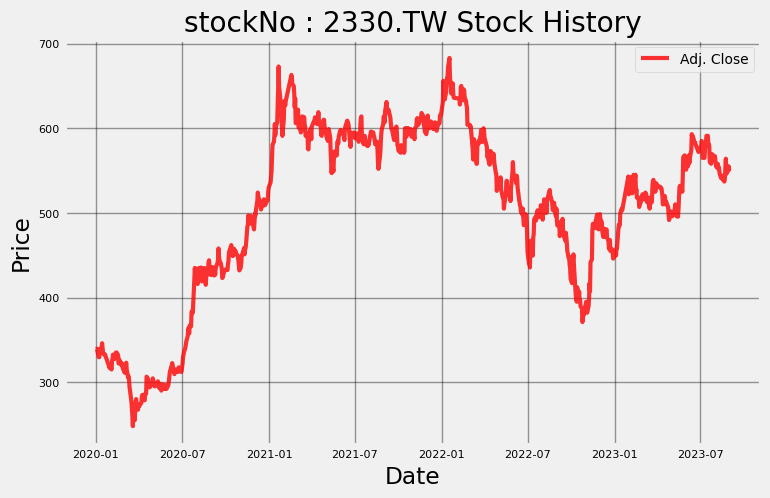

In [10]:
stock.plot_stock()

## 使用 Prophet 預言家模型預測股價

20:29:36 - cmdstanpy - INFO - Chain [1] start processing
20:29:36 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-09-10 00:00:00 = $588.12


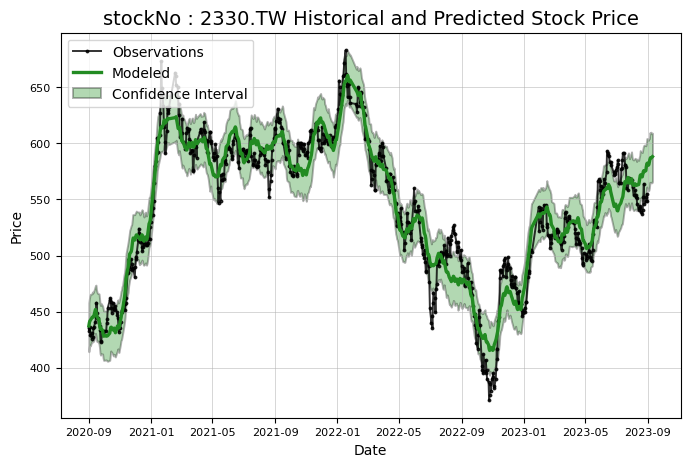

In [11]:
#輸出預測值 10天
model, model_data10 = stock.create_prophet_model(days=10)
stock.changepoint_prior_scale = 0.2

In [12]:
model_data10

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-01,450.974655,414.224059,457.814412,450.974655,450.974655,-13.793857,-13.793857,-13.793857,-3.222301,-3.222301,-3.222301,-10.571556,-10.571556,-10.571556,0.0,0.0,0.0,437.180798
1,2020-09-02,451.665347,419.136997,461.383667,451.665347,451.665347,-11.760157,-11.760157,-11.760157,-1.706043,-1.706043,-1.706043,-10.054113,-10.054113,-10.054113,0.0,0.0,0.0,439.905190
2,2020-09-03,452.356038,420.235723,463.890026,452.356038,452.356038,-10.720457,-10.720457,-10.720457,-1.073876,-1.073876,-1.073876,-9.646581,-9.646581,-9.646581,0.0,0.0,0.0,441.635581
3,2020-09-04,453.046730,419.378829,465.450057,453.046730,453.046730,-10.760994,-10.760994,-10.760994,-1.400251,-1.400251,-1.400251,-9.360743,-9.360743,-9.360743,0.0,0.0,0.0,442.285736
4,2020-09-07,455.118804,423.801162,465.717910,455.118804,455.118804,-10.670956,-10.670956,-10.670956,-1.349848,-1.349848,-1.349848,-9.321108,-9.321108,-9.321108,0.0,0.0,0.0,444.447848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,2023-09-06,597.324042,564.878102,608.384278,597.324042,597.324042,-10.263228,-10.263228,-10.263228,-1.073876,-1.073876,-1.073876,-9.189352,-9.189352,-9.189352,0.0,0.0,0.0,587.060814
736,2023-09-07,597.899577,564.848287,609.919303,597.899577,597.899577,-10.610311,-10.610311,-10.610311,-1.400251,-1.400251,-1.400251,-9.210060,-9.210060,-9.210060,0.0,0.0,0.0,587.289266
737,2023-09-08,598.475112,565.444896,609.218732,598.475112,598.475112,-11.250343,-11.250343,-11.250343,-1.873738,-1.873738,-1.873738,-9.376605,-9.376605,-9.376605,0.0,0.0,0.0,587.224769
738,2023-09-09,599.050647,564.814059,608.693665,599.049428,599.050647,-11.502147,-11.502147,-11.502147,-1.810430,-1.810430,-1.810430,-9.691718,-9.691718,-9.691718,0.0,0.0,0.0,587.548500


## 驗證資料

## 第一種分析

In [13]:
#產生相同格式 10天
model_test10 = pd.DataFrame()
model_test10['Date'] = model_data10[730:740].ds.reset_index(drop=True)
model_test10['Open'] = model_data10[730:740].trend.reset_index(drop=True)
model_test10['High'] = model_data10[730:740].yhat_upper.reset_index(drop=True)
model_test10['Low'] = model_data10[730:740].yhat_lower.reset_index(drop=True)
model_test10['Close'] = model_data10[730:740].yhat.reset_index(drop=True)
model_test10['Adj Close'] = model_data10[730:740].yhat.reset_index(drop=True)
model_test10['Volume'] = df_0910[886:896].Volume.reset_index(drop=True)

In [14]:
model_test10

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-09-01,594.446368,603.317537,559.687758,581.299858,581.299858,8991985
1,2023-09-02,595.021903,602.627526,557.608059,580.460437,580.460437,10516678
2,2023-09-03,595.597438,604.152576,558.111559,581.197891,581.197891,15117416
3,2023-09-04,596.172973,604.291476,560.441399,583.387378,583.387378,40431378
4,2023-09-05,596.748508,609.548004,565.264804,585.732969,585.732969,13669766
5,2023-09-06,597.324042,608.384278,564.878102,587.060814,587.060814,9531157
6,2023-09-07,597.899577,609.919303,564.848287,587.289266,587.289266,12220686
7,2023-09-08,598.475112,609.218732,565.444896,587.224769,587.224769,14067008
8,2023-09-09,599.050647,608.693665,564.814059,587.548500,587.548500,20717005
9,2023-09-10,599.626182,609.056898,566.078212,588.120458,588.120458,15283568


In [15]:
#將10天資料加在 2023/8/31 後
ana1 = pd.concat([df_0831,model_test10],axis=0).reset_index(drop = True)

In [16]:
#輸入 2020/1/1 - 2023/9/10 (含預測資料)
stock = Stocker(stockNo, ana1)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-09-10 00:00:00.


20:29:37 - cmdstanpy - INFO - Chain [1] start processing
20:29:37 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-09-20 00:00:00 = $585.22


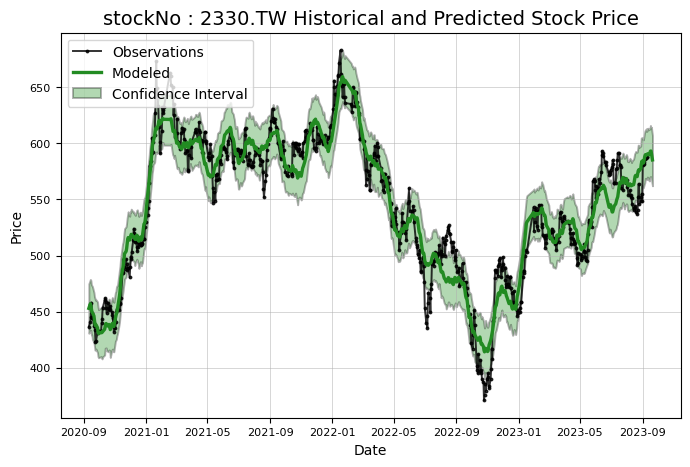

In [17]:
#預測 10天 (2023/9/11 - 2023/9/20)
model, modeldata_ana1 = stock.create_prophet_model(days=10)
stock.changepoint_prior_scale = 0.2

In [18]:
#預測數據
modeldata_ana1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-11,462.946962,430.682459,474.762656,462.946962,462.946962,-10.055550,-10.055550,-10.055550,0.016295,0.016295,0.016295,-10.071845,-10.071845,-10.071845,0.0,0.0,0.0,452.891412
1,2020-09-14,464.902240,433.056000,478.662409,464.902240,464.902240,-7.843416,-7.843416,-7.843416,5.811226,5.811226,5.811226,-13.654642,-13.654642,-13.654642,0.0,0.0,0.0,457.058824
2,2020-09-15,465.553999,433.406104,477.771840,465.553999,465.553999,-10.299559,-10.299559,-10.299559,4.810936,4.810936,4.810936,-15.110495,-15.110495,-15.110495,0.0,0.0,0.0,455.254440
3,2020-09-16,466.205759,429.209287,473.986161,466.205759,466.205759,-13.977912,-13.977912,-13.977912,2.693778,2.693778,2.693778,-16.671690,-16.671690,-16.671690,0.0,0.0,0.0,452.227846
4,2020-09-17,466.857518,429.048501,473.132199,466.857518,466.857518,-17.028029,-17.028029,-17.028029,1.293011,1.293011,1.293011,-18.321040,-18.321040,-18.321040,0.0,0.0,0.0,449.829489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,2023-09-16,603.818716,570.329364,615.944649,603.818716,603.818716,-10.760859,-10.760859,-10.760859,4.730714,4.730714,4.730714,-15.491573,-15.491573,-15.491573,0.0,0.0,0.0,593.057857
738,2023-09-17,604.409960,570.150233,613.679810,604.409960,604.409960,-11.265228,-11.265228,-11.265228,5.811226,5.811226,5.811226,-17.076454,-17.076454,-17.076454,0.0,0.0,0.0,593.144731
739,2023-09-18,605.001204,568.413199,614.253706,605.001204,605.001204,-13.934122,-13.934122,-13.934122,4.810936,4.810936,4.810936,-18.745058,-18.745058,-18.745058,0.0,0.0,0.0,591.067082
740,2023-09-19,605.592448,564.925078,610.306686,605.592448,605.592448,-17.785493,-17.785493,-17.785493,2.693778,2.693778,2.693778,-20.479271,-20.479271,-20.479271,0.0,0.0,0.0,587.806955


In [19]:
#計算 RMSE (7筆真實值)
m = 0
sum_d= 0
for i in range(len(data10)):
    for ii in range(10):
        if data10.Date[i] == modeldata_ana1.ds[732+ii]:
            d = (data10.Close[i] - modeldata_ana1.yhat[732+ii])**2
            sum_d = sum_d + d
            m = m + 1
            continue
        else:
            continue

rmse10_1 = math.sqrt(sum_d/m)

In [20]:
rmse10_1

46.79627128209717

## 第二種分析

In [21]:
#模式誤差
n = 0
sum_sigma = 0
for i in range(len(model_data10)):
        sigma = ((model_data10.yhat_upper[i] - model_data10.yhat_lower[i])/2)
        sum_sigma = sum_sigma + sigma
        n = n + 1

pf = sum_sigma/n

In [22]:
#觀測誤差
ave = sum(df_0910.Close[866:896])/30
true_sigma = 0
for i in range(30):
    s = (df_0910.Close[866+i] - ave)**2
    true_sigma += s

true_sigma = true_sigma/30
R = true_sigma

In [23]:
#權重
K = pf/(R+pf)

In [24]:
#資料同化
model_data10_2 = model_test10
for i in range(5):
    for ii in range(9):
        if df_0910.Date[890+i] != model_data10.ds[730+ii]:
            continue
        else:
            model_data10_2.Close[ii] = model_data10.yhat[730+ii] + K * (df_0910.Close[890+i]-model_data10.yhat[730+ii])
            model_data10_2['Adj Close'][ii] = model_data10_2.Close[ii]

#將10天資料加在 2023/8/31 後
ana2 =pd.concat([df_0831,model_data10_2],axis=0).reset_index(drop = True)

C:\Users\ymwang\AppData\Local\Temp\ipykernel_5248\2551046301.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data10_2.Close[ii] = model_data10.yhat[730+ii] + K * (df_0910.Close[890+i]-model_data10.yhat[730+ii])
C:\Users\ymwang\AppData\Local\Temp\ipykernel_5248\2551046301.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data10_2['Adj Close'][ii] = model_data10_2.Close[ii]
C:\Users\ymwang\AppData\Local\Temp\ipykernel_5248\2551046301.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [25]:
#輸入 2020/1/1 - 2023/9/10 (含同化後預測資料)
stock = Stocker(stockNo, ana2)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-09-10 00:00:00.


20:29:38 - cmdstanpy - INFO - Chain [1] start processing
20:29:38 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-09-20 00:00:00 = $583.27


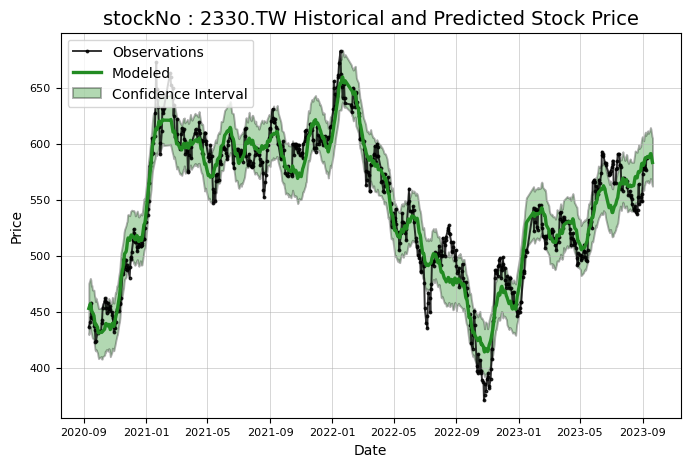

In [26]:
#預測 10天 (2023/9/11 - 2023/9/20)
model, modeldata_ana2 = stock.create_prophet_model(days=10)
stock.changepoint_prior_scale = 0.2

In [27]:
#預測數據
modeldata_ana2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-11,463.768611,429.557008,475.354566,463.768611,463.768611,-10.827437,-10.827437,-10.827437,0.008233,0.008233,0.008233,-10.835670,-10.835670,-10.835670,0.0,0.0,0.0,452.941174
1,2020-09-14,465.703699,436.015812,479.763707,465.703699,465.703699,-8.488809,-8.488809,-8.488809,5.857617,5.857617,5.857617,-14.346427,-14.346427,-14.346427,0.0,0.0,0.0,457.214889
2,2020-09-15,466.348728,432.468480,478.263036,466.348728,466.348728,-10.961566,-10.961566,-10.961566,4.806441,4.806441,4.806441,-15.768007,-15.768007,-15.768007,0.0,0.0,0.0,455.387162
3,2020-09-16,466.993757,430.746750,473.002480,466.993757,466.993757,-14.612869,-14.612869,-14.612869,2.678467,2.678467,2.678467,-17.291336,-17.291336,-17.291336,0.0,0.0,0.0,452.380888
4,2020-09-17,467.638786,428.489148,473.522764,467.638786,467.638786,-17.582281,-17.582281,-17.582281,1.317947,1.317947,1.317947,-18.900228,-18.900228,-18.900228,0.0,0.0,0.0,450.056505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,2023-09-16,602.370539,568.952864,614.454226,602.370539,602.370539,-11.326490,-11.326490,-11.326490,4.813427,4.813427,4.813427,-16.139917,-16.139917,-16.139917,0.0,0.0,0.0,591.044050
738,2023-09-17,602.952643,568.301638,612.981462,602.952643,602.952643,-11.828572,-11.828572,-11.828572,5.857617,5.857617,5.857617,-17.686189,-17.686189,-17.686189,0.0,0.0,0.0,591.124072
739,2023-09-18,603.534747,567.743841,609.953606,603.534747,603.534747,-14.507405,-14.507405,-14.507405,4.806441,4.806441,4.806441,-19.313847,-19.313847,-19.313847,0.0,0.0,0.0,589.027342
740,2023-09-19,604.116851,563.668929,606.541151,604.116851,604.127725,-18.327333,-18.327333,-18.327333,2.678467,2.678467,2.678467,-21.005801,-21.005801,-21.005801,0.0,0.0,0.0,585.789518


In [28]:
#計算 RMSE (7筆真實值)
m = 0
sum_d= 0
for i in range(len(data10)):
    for ii in range(10):
        if data10.Date[i] == modeldata_ana2.ds[732+ii]:
            d = (data10.Close[i] - modeldata_ana2.yhat[732+ii])**2
            sum_d = sum_d + d
            m = m + 1
            continue
        else:
            continue

rmse10_2 = math.sqrt(sum_d/m)

In [29]:
rmse10_2

44.70373409676738

## 第三種分析

In [30]:
#直接輸入真實值 2020/1/1 - 2023/9/10
stock = Stocker(stockNo, df_0910)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-09-08 00:00:00.


20:29:39 - cmdstanpy - INFO - Chain [1] start processing
20:29:39 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-09-18 00:00:00 = $580.60


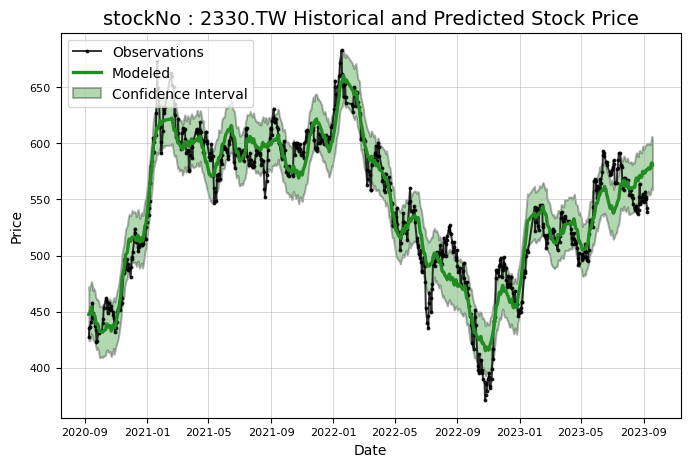

In [31]:
#預測 10天 (2023/9/11 - 2023/9/20)
model, modeldata_ana3 = stock.create_prophet_model(days=10)
stock.changepoint_prior_scale = 0.2

In [32]:
#預測數據
modeldata_ana3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-09,462.080918,424.630710,472.430417,462.080918,462.080918,-14.583214,-14.583214,-14.583214,-1.268254,-1.268254,-1.268254,-13.314960,-13.314960,-13.314960,0.0,0.0,0.0,447.497704
1,2020-09-10,462.737347,425.661991,469.379803,462.737347,462.737347,-15.360383,-15.360383,-15.360383,-1.406066,-1.406066,-1.406066,-13.954318,-13.954318,-13.954318,0.0,0.0,0.0,447.376964
2,2020-09-11,463.393776,424.086837,471.657325,463.393776,463.393776,-14.826342,-14.826342,-14.826342,-0.127410,-0.127410,-0.127410,-14.698931,-14.698931,-14.698931,0.0,0.0,0.0,448.567435
3,2020-09-14,465.363064,430.502272,476.831466,465.363064,465.363064,-11.161823,-11.161823,-11.161823,6.354974,6.354974,6.354974,-17.516797,-17.516797,-17.516797,0.0,0.0,0.0,454.201241
4,2020-09-15,466.019493,429.726976,475.663521,466.019493,466.019493,-13.532958,-13.532958,-13.532958,5.096256,5.096256,5.096256,-18.629214,-18.629214,-18.629214,0.0,0.0,0.0,452.486535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,2023-09-14,594.712897,554.615799,599.652777,594.712897,594.712897,-16.863110,-16.863110,-16.863110,-0.127410,-0.127410,-0.127410,-16.735700,-16.735700,-16.735700,0.0,0.0,0.0,577.849787
736,2023-09-15,595.257653,557.380554,601.710407,595.257653,595.257653,-15.198702,-15.198702,-15.198702,2.588847,2.588847,2.588847,-17.787550,-17.787550,-17.787550,0.0,0.0,0.0,580.058951
737,2023-09-16,595.802408,559.883349,604.732204,595.802408,595.802408,-13.582730,-13.582730,-13.582730,5.336401,5.336401,5.336401,-18.919132,-18.919132,-18.919132,0.0,0.0,0.0,582.219678
738,2023-09-17,596.347164,560.569763,606.184037,596.347164,596.347164,-13.766987,-13.766987,-13.766987,6.354974,6.354974,6.354974,-20.121960,-20.121960,-20.121960,0.0,0.0,0.0,582.580177


In [33]:
#計算 RMSE (7筆真實值)
m = 0
sum_d= 0
for i in range(len(data10)):
    for ii in range(8):
        if data10.Date[i] == modeldata_ana3.ds[732+ii]:
            d = (data10.Close[i] - modeldata_ana3.yhat[732+ii])**2
            sum_d = sum_d + d
            m = m + 1
            continue
        else:
            continue

rmse10_3 = math.sqrt(sum_d/m)

In [34]:
rmse10_3

34.39648157087813

## 預測20天資料

In [35]:
#真實數據 2020/1/1 - 2023/9/20
stockNo = "2330.TW"
start_date = '2020-01-01'
end_date = '2023-09-21'
df_0920 = yf.download(stockNo, start=start_date, end=end_date)
df_0920 = df_0920.reset_index()

[*********************100%%**********************]  1 of 1 completed


## 第二部份 使用 Stocker 預測股價

In [36]:
#預測股價 輸入 2020/1/1 - 2023/8/31
from stocker import Stocker
stock = Stocker(stockNo, df_0831)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-08-31 00:00:00.


## 使用 Prophet 預言家模型預測股價

20:29:40 - cmdstanpy - INFO - Chain [1] start processing
20:29:41 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-09-20 00:00:00 = $585.07


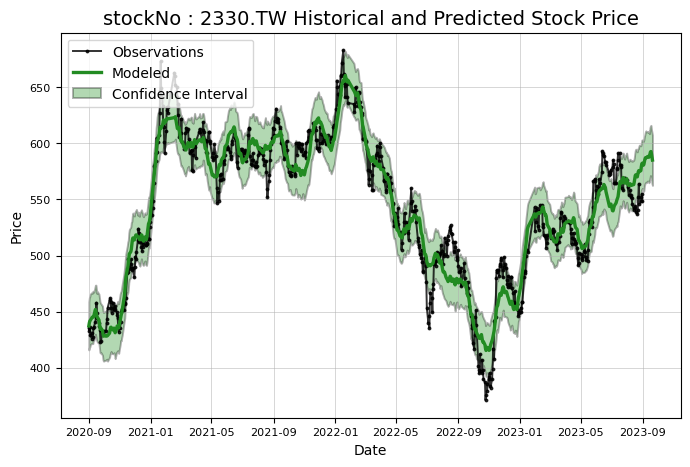

In [37]:
#輸出預測值 20天
model, model_data20 = stock.create_prophet_model(days=20)
stock.changepoint_prior_scale = 0.2

In [38]:
model_data20

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-01,450.974655,415.843265,458.714746,450.974655,450.974655,-13.793857,-13.793857,-13.793857,-3.222301,-3.222301,-3.222301,-10.571556,-10.571556,-10.571556,0.0,0.0,0.0,437.180798
1,2020-09-02,451.665347,418.100667,462.510311,451.665347,451.665347,-11.760157,-11.760157,-11.760157,-1.706043,-1.706043,-1.706043,-10.054113,-10.054113,-10.054113,0.0,0.0,0.0,439.905190
2,2020-09-03,452.356038,418.407682,463.520580,452.356038,452.356038,-10.720457,-10.720457,-10.720457,-1.073876,-1.073876,-1.073876,-9.646581,-9.646581,-9.646581,0.0,0.0,0.0,441.635581
3,2020-09-04,453.046730,420.444536,465.692270,453.046730,453.046730,-10.760994,-10.760994,-10.760994,-1.400251,-1.400251,-1.400251,-9.360743,-9.360743,-9.360743,0.0,0.0,0.0,442.285736
4,2020-09-07,455.118804,421.966990,467.009070,455.118804,455.118804,-10.670956,-10.670956,-10.670956,-1.349848,-1.349848,-1.349848,-9.321108,-9.321108,-9.321108,0.0,0.0,0.0,444.447848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2023-09-16,603.079392,571.285291,615.503572,602.916284,603.231314,-10.730443,-10.730443,-10.730443,5.100875,5.100875,5.100875,-15.831318,-15.831318,-15.831318,0.0,0.0,0.0,592.348948
746,2023-09-17,603.654927,569.671519,615.990826,603.429730,603.866832,-10.964357,-10.964357,-10.964357,6.216140,6.216140,6.216140,-17.180496,-17.180496,-17.180496,0.0,0.0,0.0,592.690570
747,2023-09-18,604.230461,568.848688,612.285202,603.942150,604.482697,-13.469836,-13.469836,-13.469836,5.143935,5.143935,5.143935,-18.613771,-18.613771,-18.613771,0.0,0.0,0.0,590.760625
748,2023-09-19,604.805996,564.211464,609.819818,604.467397,605.107386,-17.215187,-17.215187,-17.215187,2.902077,2.902077,2.902077,-20.117264,-20.117264,-20.117264,0.0,0.0,0.0,587.590809


## 驗證資料

In [39]:
#驗證資料 2023/9/20 - 2023/9/30
stockNo = "2330.TW"
start_date = '2023-09-20'
end_date = '2023-09-30'
data20 = yf.download(stockNo, start=start_date, end=end_date)
data20 = data20.reset_index()

[*********************100%%**********************]  1 of 1 completed


## 第一種分析

In [40]:
#產生相同格式 20天
model_test20 = pd.DataFrame()
model_test20['Date'] = model_data20[730:750].ds.reset_index(drop=True)
model_test20['Open'] = model_data20[730:750].trend.reset_index(drop=True)
model_test20['High'] = model_data20[730:750].yhat_upper.reset_index(drop=True)
model_test20['Low'] = model_data20[730:750].yhat_lower.reset_index(drop=True)
model_test20['Close'] = model_data20[730:750].yhat.reset_index(drop=True)
model_test20['Adj Close'] = model_data20[730:750].yhat.reset_index(drop=True)
model_test20['Volume'] = df_0920[884:904].Volume.reset_index(drop=True)

In [41]:
model_test20

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-09-01,594.446368,602.699174,559.651694,581.299858,581.299858,23280827
1,2023-09-02,595.021903,601.659935,557.010341,580.460437,580.460437,24144537
2,2023-09-03,595.597438,603.084144,557.724157,581.197891,581.197891,8991985
3,2023-09-04,596.172973,605.892574,561.837604,583.387378,583.387378,10516678
4,2023-09-05,596.748508,607.796665,564.082854,585.732969,585.732969,15117416
5,2023-09-06,597.324042,610.168765,564.618693,587.060814,587.060814,40431378
6,2023-09-07,597.899577,611.096558,565.414117,587.289266,587.289266,13669766
7,2023-09-08,598.475112,610.209743,564.980715,587.224769,587.224769,9531157
8,2023-09-09,599.050647,610.281174,565.437042,587.548500,587.548500,12220686
9,2023-09-10,599.626182,610.312457,566.318852,588.120458,588.120458,14067008


In [42]:
#將20天資料加在 2023/8/31 後
ana1 = pd.concat([df_0831,model_test20],axis=0).reset_index(drop = True)

In [43]:
#輸入 2020/1/1 - 2023/9/20 (含預測資料)
stock = Stocker(stockNo, ana1)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-09-20 00:00:00.


20:29:42 - cmdstanpy - INFO - Chain [1] start processing
20:29:42 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-09-30 00:00:00 = $571.22


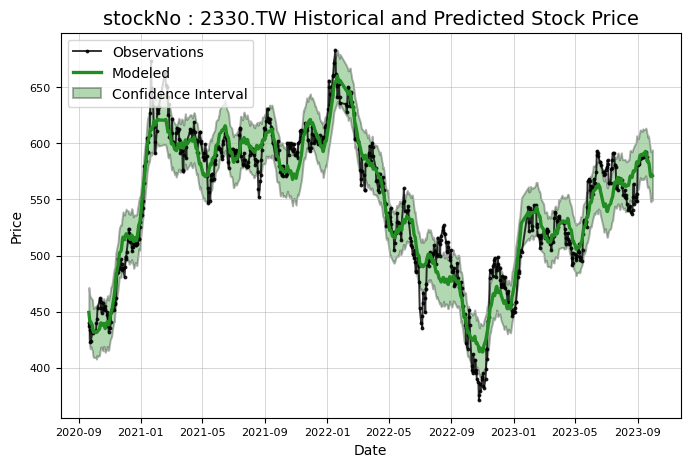

In [44]:
#預測 10天 (2023/9/21 - 2023/9/30)
model, modeldata_ana1 = stock.create_prophet_model(days=10)
stock.changepoint_prior_scale = 0.2

In [45]:
#預設數據
modeldata_ana1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-21,473.061509,426.107144,471.552041,473.061509,473.061509,-23.826452,-23.826452,-23.826452,2.087891,2.087891,2.087891,-25.914343,-25.914343,-25.914343,0.0,0.0,0.0,449.235057
1,2020-09-22,473.686198,423.992743,467.858786,473.686198,473.686198,-28.815214,-28.815214,-28.815214,-0.913692,-0.913692,-0.913692,-27.901522,-27.901522,-27.901522,0.0,0.0,0.0,444.870984
2,2020-09-23,474.310887,418.023979,464.407367,474.310887,474.310887,-33.130594,-33.130594,-33.130594,-3.253842,-3.253842,-3.253842,-29.876751,-29.876751,-29.876751,0.0,0.0,0.0,441.180293
3,2020-09-24,474.935576,416.716546,463.135281,474.935576,474.935576,-35.085067,-35.085067,-35.085067,-3.262423,-3.262423,-3.262423,-31.822644,-31.822644,-31.822644,0.0,0.0,0.0,439.850509
4,2020-09-25,475.560265,418.892176,462.469512,475.560265,475.560265,-34.955439,-34.955439,-34.955439,-1.232273,-1.232273,-1.232273,-33.723166,-33.723166,-33.723166,0.0,0.0,0.0,440.604826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,2023-09-26,608.945108,549.195893,594.172415,608.945108,608.945108,-37.443321,-37.443321,-37.443321,-3.253842,-3.253842,-3.253842,-34.189478,-34.189478,-34.189478,0.0,0.0,0.0,571.501788
742,2023-09-27,609.536974,547.760640,592.366615,609.536974,609.536974,-39.275627,-39.275627,-39.275627,-3.262423,-3.262423,-3.262423,-36.013204,-36.013204,-36.013204,0.0,0.0,0.0,570.261346
743,2023-09-28,610.128839,549.652972,592.791798,610.128839,610.128839,-38.993935,-38.993935,-38.993935,-1.232273,-1.232273,-1.232273,-37.761662,-37.761662,-37.761662,0.0,0.0,0.0,571.134904
744,2023-09-29,610.720704,551.159026,593.952647,610.720704,610.720704,-38.612241,-38.612241,-38.612241,0.812479,0.812479,0.812479,-39.424720,-39.424720,-39.424720,0.0,0.0,0.0,572.108464


In [46]:
#計算 RMSE (7筆真實值)
m = 0
sum_d= 0
for i in range(len(data20)):
    for ii in range(10):
        if data20.Date[i] == modeldata_ana1.ds[736+ii]:
            d = (data20.Close[i] - modeldata_ana1.yhat[736+ii])**2
            sum_d = sum_d + d
            m = m + 1
            continue
        else:
            continue

rmse20_1 = math.sqrt(sum_d/m)

In [47]:
rmse20_1

52.95036908549396

## 第二種分析

In [48]:
#模式誤差
n = 0
sum_sigma = 0
for i in range(len(model_data20)):
        sigma = ((model_data20.yhat_upper[i] - model_data20.yhat_lower[i])/2)
        sum_sigma = sum_sigma + sigma
        n = n + 1

pf = sum_sigma/n

In [49]:
#觀測誤差
ave = sum(df_0920.Close[874:904])/30
true_sigma = 0
for i in range(30):
    s = (df_0920.Close[874+i] - ave)**2
    true_sigma += s

true_sigma = true_sigma/30
R = true_sigma

In [50]:
#權重
K = pf/(R+pf)

In [51]:
#資料同化
model_data20_2 = model_test20
for i in range(14):
    for ii in range(20):
        if df_0920.Date[890+i] != model_data20.ds[730+ii]:
            continue
        else:
            model_data20_2.Close[ii] = model_data20.yhat[730+ii] + K * (df_0920.Close[890+i]-model_data20.yhat[730+ii])
            model_data20_2['Adj Close'][ii] = model_data20_2.Close[ii]

#將20天資料加在 2023/8/31 後
ana2 =pd.concat([df_0831,model_data20_2],axis=0).reset_index(drop = True)

C:\Users\ymwang\AppData\Local\Temp\ipykernel_5248\2748312838.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data20_2.Close[ii] = model_data20.yhat[730+ii] + K * (df_0920.Close[890+i]-model_data20.yhat[730+ii])
C:\Users\ymwang\AppData\Local\Temp\ipykernel_5248\2748312838.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data20_2['Adj Close'][ii] = model_data20_2.Close[ii]
C:\Users\ymwang\AppData\Local\Temp\ipykernel_5248\2748312838.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [52]:
#輸入 2020/1/1 - 2023/9/20 (含同化後預測資料)
stock = Stocker(stockNo, ana2)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-09-20 00:00:00.


20:29:43 - cmdstanpy - INFO - Chain [1] start processing
20:29:43 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-09-30 00:00:00 = $566.02


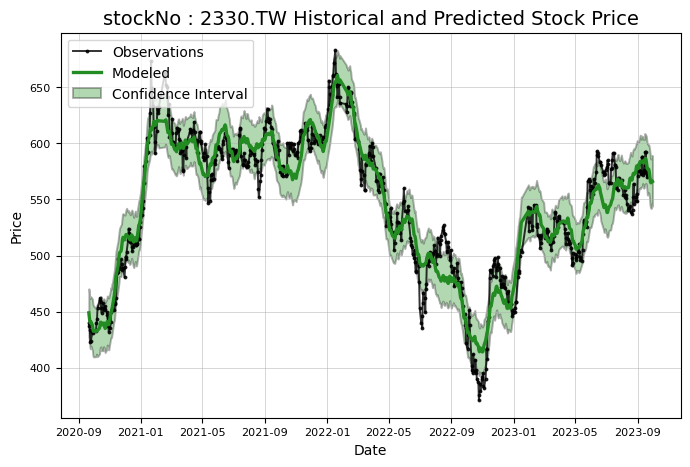

In [53]:
#預測 10天 (2023/9/21 - 2023/9/30)
model, modeldata_ana2 = stock.create_prophet_model(days=10)
stock.changepoint_prior_scale = 0.2

In [54]:
#預測數據
modeldata_ana2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-21,474.579818,427.503049,470.345950,474.579818,474.579818,-25.689285,-25.689285,-25.689285,2.252286,2.252286,2.252286,-27.941571,-27.941571,-27.941571,0.0,0.0,0.0,448.890533
1,2020-09-22,475.191102,425.171649,468.098370,475.191102,475.191102,-30.636455,-30.636455,-30.636455,-0.843348,-0.843348,-0.843348,-29.793107,-29.793107,-29.793107,0.0,0.0,0.0,444.554647
2,2020-09-23,475.802387,418.328893,461.676140,475.802387,475.802387,-34.788180,-34.788180,-34.788180,-3.162913,-3.162913,-3.162913,-31.625267,-31.625267,-31.625267,0.0,0.0,0.0,441.014207
3,2020-09-24,476.413671,416.814136,461.993330,476.413671,476.413671,-36.481797,-36.481797,-36.481797,-3.058048,-3.058048,-3.058048,-33.423748,-33.423748,-33.423748,0.0,0.0,0.0,439.931874
4,2020-09-25,477.024956,419.438338,463.165460,477.024956,477.024956,-36.122532,-36.122532,-36.122532,-0.946948,-0.946948,-0.946948,-35.175584,-35.175584,-35.175584,0.0,0.0,0.0,440.902423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,2023-09-26,604.580694,542.858898,586.965746,604.580694,604.580694,-38.767790,-38.767790,-38.767790,-3.162913,-3.162913,-3.162913,-35.604877,-35.604877,-35.604877,0.0,0.0,0.0,565.812904
742,2023-09-27,605.147649,542.068584,585.968705,605.147649,605.147649,-40.340541,-40.340541,-40.340541,-3.058048,-3.058048,-3.058048,-37.282493,-37.282493,-37.282493,0.0,0.0,0.0,564.807107
743,2023-09-28,605.714603,542.128922,586.797940,605.714603,605.714603,-39.836990,-39.836990,-39.836990,-0.946948,-0.946948,-0.946948,-38.890042,-38.890042,-38.890042,0.0,0.0,0.0,565.877613
744,2023-09-29,606.281558,546.347501,589.286023,606.281558,606.281558,-39.358577,-39.358577,-39.358577,1.061372,1.061372,1.061372,-40.419949,-40.419949,-40.419949,0.0,0.0,0.0,566.922981


In [55]:
#計算 RMSE (7筆真實值)
m = 0
sum_d= 0
for i in range(len(data20)):
    for ii in range(10):
        if data20.Date[i] == modeldata_ana2.ds[736+ii]:
            d = (data20.Close[i] - modeldata_ana2.yhat[736+ii])**2
            sum_d = sum_d + d
            m = m + 1
            continue
        else:
            continue

rmse20_2 = math.sqrt(sum_d/m)

In [56]:
rmse20_2

47.153225813462264

## 第三種分析

In [57]:
#直接輸入真實值 2020/1/1 - 2023/9/20
stock = Stocker(stockNo, df_0920)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-09-20 00:00:00.


20:29:44 - cmdstanpy - INFO - Chain [1] start processing
20:29:44 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-09-30 00:00:00 = $551.03


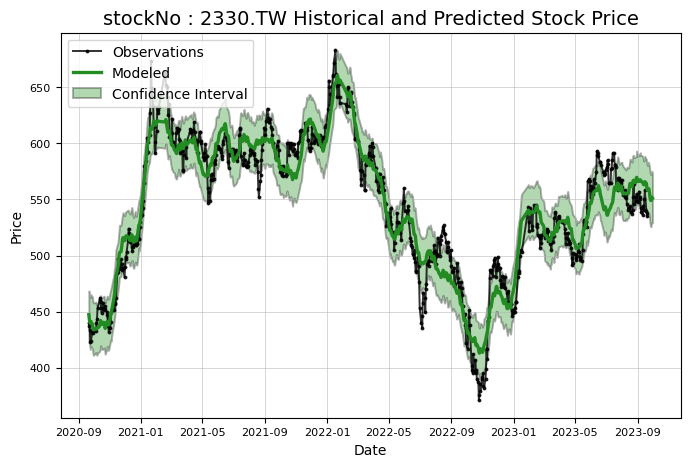

In [58]:
#預測 10天 (2023/9/21 - 2023/9/30)
model, modeldata_ana3 = stock.create_prophet_model(days=10)
stock.changepoint_prior_scale = 0.2

In [59]:
#預測數據
modeldata_ana3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-21,477.759866,425.548615,468.501004,477.759866,477.759866,-30.493219,-30.493219,-30.493219,2.696695,2.696695,2.696695,-33.189914,-33.189914,-33.189914,0.0,0.0,0.0,447.266647
1,2020-09-22,478.364551,423.154662,467.585583,478.364551,478.364551,-35.213562,-35.213562,-35.213562,-0.559092,-0.559092,-0.559092,-34.654471,-34.654471,-34.654471,0.0,0.0,0.0,443.150989
2,2020-09-23,478.969237,418.350247,463.342676,478.969237,478.969237,-38.930451,-38.930451,-38.930451,-2.848948,-2.848948,-2.848948,-36.081503,-36.081503,-36.081503,0.0,0.0,0.0,440.038786
3,2020-09-24,479.573922,416.228031,462.507686,479.573922,479.573922,-40.001295,-40.001295,-40.001295,-2.535914,-2.535914,-2.535914,-37.465380,-37.465380,-37.465380,0.0,0.0,0.0,439.572627
4,2020-09-25,480.178607,419.168373,465.154090,480.178607,480.178607,-39.035757,-39.035757,-39.035757,-0.234074,-0.234074,-0.234074,-38.801683,-38.801683,-38.801683,0.0,0.0,0.0,441.142850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,2023-09-26,591.416878,526.133397,572.760801,591.416878,591.416878,-41.976872,-41.976872,-41.976872,-2.848948,-2.848948,-2.848948,-39.127923,-39.127923,-39.127923,0.0,0.0,0.0,549.440006
736,2023-09-27,591.908113,525.660706,572.197481,591.908113,591.908113,-42.936306,-42.936306,-42.936306,-2.535914,-2.535914,-2.535914,-40.400391,-40.400391,-40.400391,0.0,0.0,0.0,548.971807
737,2023-09-28,592.399348,528.541831,574.295830,592.399348,592.403961,-41.853815,-41.853815,-41.853815,-0.234074,-0.234074,-0.234074,-41.619741,-41.619741,-41.619741,0.0,0.0,0.0,550.545533
738,2023-09-29,592.890583,529.305656,575.077209,592.890583,592.918788,-41.014964,-41.014964,-41.014964,1.770406,1.770406,1.770406,-42.785369,-42.785369,-42.785369,0.0,0.0,0.0,551.875619


In [60]:
#計算 RMSE (7筆真實值)
m = 0
sum_d= 0
for i in range(len(data20)):
    for ii in range(10):
        if data20.Date[i] == modeldata_ana3.ds[730+ii]:
            d = (data20.Close[i] - modeldata_ana3.yhat[730+ii])**2
            sum_d = sum_d + d
            m = m + 1
            continue
        else:
            continue

rmse20_3 = math.sqrt(sum_d/m)

In [61]:
rmse20_3

30.478494601145307

## 預測30天資料

In [62]:
#真實數據 2020/1/1 - 2023/9/30
stockNo = "2330.TW"
start_date = '2020-01-01'
end_date = '2023-10-01'
df_0930 = yf.download(stockNo, start=start_date, end=end_date)
df_0930 = df_0930.reset_index()

[*********************100%%**********************]  1 of 1 completed


## 第二部份 使用 Stocker 預測股價

In [63]:
#預測股價 輸入 2020/1/1 - 2023/8/31
from stocker import Stocker
stock = Stocker(stockNo, df_0831)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-08-31 00:00:00.


## 使用 Prophet 預言家模型預測股價

20:29:45 - cmdstanpy - INFO - Chain [1] start processing
20:29:45 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-09-30 00:00:00 = $574.61


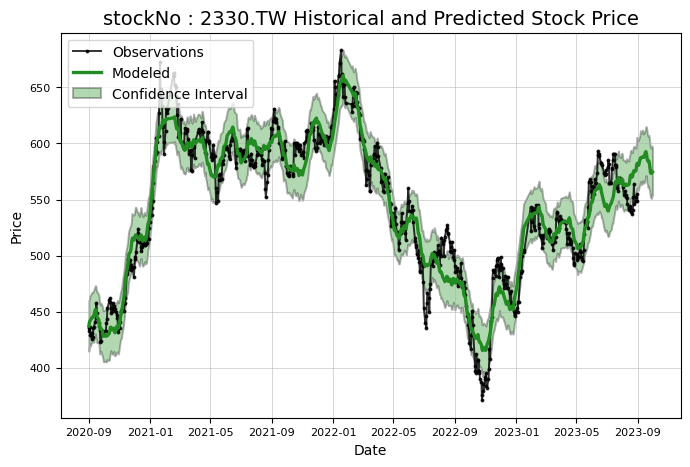

In [64]:
#輸出預測值 30天
model, model_data30 = stock.create_prophet_model(days=30)
stock.changepoint_prior_scale = 0.2

In [65]:
model_data30

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-01,450.974655,414.645064,459.786588,450.974655,450.974655,-13.793857,-13.793857,-13.793857,-3.222301,-3.222301,-3.222301,-10.571556,-10.571556,-10.571556,0.0,0.0,0.0,437.180798
1,2020-09-02,451.665347,419.042351,460.673828,451.665347,451.665347,-11.760157,-11.760157,-11.760157,-1.706043,-1.706043,-1.706043,-10.054113,-10.054113,-10.054113,0.0,0.0,0.0,439.905190
2,2020-09-03,452.356038,421.344596,463.959985,452.356038,452.356038,-10.720457,-10.720457,-10.720457,-1.073876,-1.073876,-1.073876,-9.646581,-9.646581,-9.646581,0.0,0.0,0.0,441.635581
3,2020-09-04,453.046730,419.157063,464.233923,453.046730,453.046730,-10.760994,-10.760994,-10.760994,-1.400251,-1.400251,-1.400251,-9.360743,-9.360743,-9.360743,0.0,0.0,0.0,442.285736
4,2020-09-07,455.118804,422.829274,467.208612,455.118804,455.118804,-10.670956,-10.670956,-10.670956,-1.349848,-1.349848,-1.349848,-9.321108,-9.321108,-9.321108,0.0,0.0,0.0,444.447848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2023-09-26,608.834741,552.429987,596.119011,607.818305,609.794891,-34.303837,-34.303837,-34.303837,-2.891871,-2.891871,-2.891871,-31.411965,-31.411965,-31.411965,0.0,0.0,0.0,574.530904
756,2023-09-27,609.410276,551.146357,595.948007,608.328261,610.455809,-36.097854,-36.097854,-36.097854,-3.121006,-3.121006,-3.121006,-32.976848,-32.976848,-32.976848,0.0,0.0,0.0,573.312422
757,2023-09-28,609.985811,551.047977,597.500270,608.836016,611.097140,-35.874092,-35.874092,-35.874092,-1.377612,-1.377612,-1.377612,-34.496480,-34.496480,-34.496480,0.0,0.0,0.0,574.111718
758,2023-09-29,610.561346,554.648829,597.734976,609.313362,611.755836,-35.400258,-35.400258,-35.400258,0.562667,0.562667,0.562667,-35.962925,-35.962925,-35.962925,0.0,0.0,0.0,575.161087


## 驗證資料

In [66]:
#驗證資料 2023/10/1 - 2023/10/10
stockNo = "2330.TW"
start_date = '2023-10-01'
end_date = '2023-10-10'
data30 = yf.download(stockNo, start=start_date, end=end_date)
data30 = data30.reset_index()

[*********************100%%**********************]  1 of 1 completed


## 第一種分析

In [67]:
#產生相同格式 30天
model_test30 = pd.DataFrame()
model_test30['Date'] = model_data30[730:760].ds.reset_index(drop=True)
model_test30['Open'] = model_data30[730:760].trend.reset_index(drop=True)
model_test30['High'] = model_data30[730:760].yhat_upper.reset_index(drop=True)
model_test30['Low'] = model_data30[730:760].yhat_lower.reset_index(drop=True)
model_test30['Close'] = model_data30[730:760].yhat.reset_index(drop=True)
model_test30['Adj Close'] = model_data30[730:760].yhat.reset_index(drop=True)
model_test30['Volume'] = df_0930[880:910].Volume.reset_index(drop=True)

In [68]:
model_test30

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-09-01,594.446368,604.969296,560.604517,581.299858,581.299858,17592345
1,2023-09-02,595.021903,602.486207,558.135925,580.460437,580.460437,16633821
2,2023-09-03,595.597438,603.931875,560.468607,581.197891,581.197891,14594304
3,2023-09-04,596.172973,605.490930,562.138035,583.387378,583.387378,20636332
4,2023-09-05,596.748508,607.483147,563.399711,585.732969,585.732969,23280827
5,2023-09-06,597.324042,611.410467,566.044254,587.060814,587.060814,24144537
6,2023-09-07,597.899577,609.954607,564.328518,587.289266,587.289266,8991985
7,2023-09-08,598.475112,609.239254,563.193696,587.224769,587.224769,10516678
8,2023-09-09,599.050647,611.132100,564.858810,587.548500,587.548500,15117416
9,2023-09-10,599.626182,611.929987,566.578906,588.120458,588.120458,40431378


In [69]:
#將30天資料加在 2023/8/31 後
ana1 = pd.concat([df_0831,model_test30],axis=0).reset_index(drop = True)

In [70]:
#輸入 2020/1/1 - 2023/9/30 (含預測資料)
stock = Stocker(stockNo, ana1)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-09-30 00:00:00.


20:29:46 - cmdstanpy - INFO - Chain [1] start processing
20:29:47 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-10-10 00:00:00 = $559.34


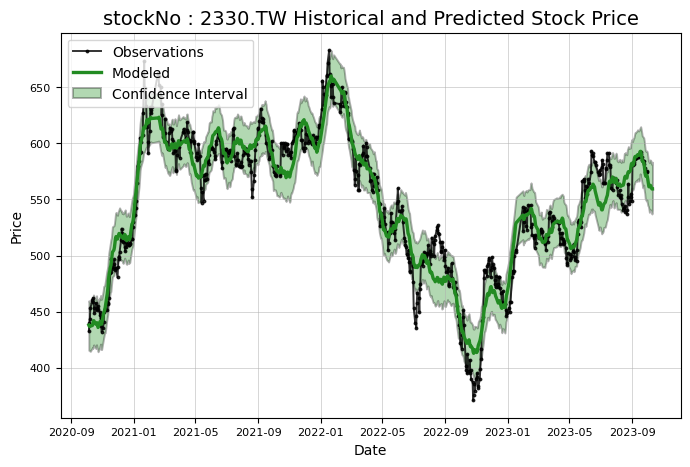

In [71]:
#預測 10天 (2023/10/1 - 2023/10/10)
model, modeldata_ana1 = stock.create_prophet_model(days=10)
stock.changepoint_prior_scale = 0.2

In [72]:
#預測數據
modeldata_ana1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-05,487.114234,415.492441,459.701475,487.114234,487.114234,-49.153424,-49.153424,-49.153424,-1.923641,-1.923641,-1.923641,-47.229783,-47.229783,-47.229783,0.0,0.0,0.0,437.960810
1,2020-10-06,487.704598,415.386780,458.595237,487.704598,487.704598,-50.833050,-50.833050,-50.833050,-2.309478,-2.309478,-2.309478,-48.523572,-48.523572,-48.523572,0.0,0.0,0.0,436.871548
2,2020-10-07,488.294962,414.833324,458.641177,488.294962,488.294962,-51.561368,-51.561368,-51.561368,-1.828018,-1.828018,-1.828018,-49.733350,-49.733350,-49.733350,0.0,0.0,0.0,436.733593
3,2020-10-08,488.885326,414.573192,458.149535,488.885326,488.885326,-51.921982,-51.921982,-51.921982,-1.060179,-1.060179,-1.060179,-50.861803,-50.861803,-50.861803,0.0,0.0,0.0,436.963344
4,2020-10-12,491.246781,417.902966,458.854716,491.246781,491.246781,-53.598904,-53.598904,-53.598904,1.037853,1.037853,1.037853,-54.636756,-54.636756,-54.636756,0.0,0.0,0.0,437.647878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,2023-10-06,611.060749,540.577543,585.055988,611.060749,611.060749,-48.508396,-48.508396,-48.508396,-0.947177,-0.947177,-0.947177,-47.561219,-47.561219,-47.561219,0.0,0.0,0.0,562.552353
744,2023-10-07,611.628493,540.091860,584.370074,611.628493,611.628493,-49.927754,-49.927754,-49.927754,-1.093952,-1.093952,-1.093952,-48.833802,-48.833802,-48.833802,0.0,0.0,0.0,561.700739
745,2023-10-08,612.196237,539.567942,581.701620,612.196237,612.196237,-51.946606,-51.946606,-51.946606,-1.923641,-1.923641,-1.923641,-50.022965,-50.022965,-50.022965,0.0,0.0,0.0,560.249631
746,2023-10-09,612.763980,537.003650,580.951328,612.763980,612.763980,-53.441075,-53.441075,-53.441075,-2.309478,-2.309478,-2.309478,-51.131597,-51.131597,-51.131597,0.0,0.0,0.0,559.322906


In [73]:
#計算 RMSE (5筆真實值)
m = 0
sum_d= 0
for i in range(len(data30)):
    for ii in range(10):
        if data30.Date[i] == modeldata_ana1.ds[738+ii]:
            d = (data30.Close[i] - modeldata_ana1.yhat[738+ii])**2
            sum_d = sum_d + d
            m = m + 1
            continue
        else:
            continue

rmse30_1 = math.sqrt(sum_d/m)

In [74]:
rmse30_1

33.987396940526004

## 第二種分析

In [75]:
#模式誤差
n = 0
sum_sigma = 0
for i in range(len(model_data30)):
        sigma = ((model_data30.yhat_upper[i] - model_data30.yhat_lower[i])/2)
        sum_sigma = sum_sigma + sigma
        n = n + 1

pf = sum_sigma/n

In [76]:
#觀測誤差
ave = sum(df_0930.Close[880:910])/30
true_sigma = 0
for i in range(30):
    s = (df_0930.Close[880+i] - ave)**2
    true_sigma += s

true_sigma = true_sigma/30
R = true_sigma

In [77]:
#權重
K = pf/(R+pf)

In [78]:
#資料同化
model_data30_2 = model_test30
for i in range(20):
    for ii in range(30):
        if df_0930.Date[890+i] != model_data30.ds[730+ii]:
            continue
        else:
            model_data30_2.Close[ii] = model_data30.yhat[730+ii] + K * (df_0930.Close[890+i]-model_data30.yhat[730+ii])
            model_data30_2['Adj Close'][ii] = model_data30_2.Close[ii]

#將30天資料加在 2023/8/31 後
ana2 =pd.concat([df_0831,model_data30_2],axis=0).reset_index(drop = True)

C:\Users\ymwang\AppData\Local\Temp\ipykernel_5248\3694250433.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data30_2.Close[ii] = model_data30.yhat[730+ii] + K * (df_0930.Close[890+i]-model_data30.yhat[730+ii])
C:\Users\ymwang\AppData\Local\Temp\ipykernel_5248\3694250433.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data30_2['Adj Close'][ii] = model_data30_2.Close[ii]
C:\Users\ymwang\AppData\Local\Temp\ipykernel_5248\3694250433.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [79]:
#輸入 2020/1/1 - 2023/9/30 (含同化後預測資料)
stock = Stocker(stockNo, ana2)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-09-30 00:00:00.


20:29:48 - cmdstanpy - INFO - Chain [1] start processing
20:29:48 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-10-10 00:00:00 = $556.91


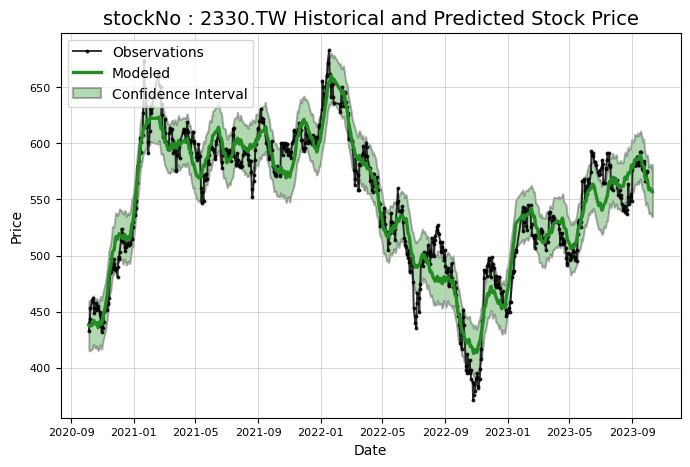

In [80]:
#預測 10天 (2023/10/1 - 2023/10/10)
model, modeldata_ana2 = stock.create_prophet_model(days=10)
stock.changepoint_prior_scale = 0.2

In [81]:
#預測數據
modeldata_ana2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-05,487.511740,415.352058,459.119632,487.511740,487.511740,-49.596949,-49.596949,-49.596949,-1.961955,-1.961955,-1.961955,-47.634994,-47.634994,-47.634994,0.0,0.0,0.0,437.914791
1,2020-10-06,488.102122,415.288316,459.172201,488.102122,488.102122,-51.137515,-51.137515,-51.137515,-2.258011,-2.258011,-2.258011,-48.879504,-48.879504,-48.879504,0.0,0.0,0.0,436.964607
2,2020-10-07,488.692504,414.784536,460.310145,488.692504,488.692504,-51.773643,-51.773643,-51.773643,-1.726241,-1.726241,-1.726241,-50.047402,-50.047402,-50.047402,0.0,0.0,0.0,436.918861
3,2020-10-08,489.282886,415.534836,458.977146,489.282886,489.282886,-52.149507,-52.149507,-52.149507,-1.007864,-1.007864,-1.007864,-51.141643,-51.141643,-51.141643,0.0,0.0,0.0,437.133379
4,2020-10-12,491.644414,416.831883,458.954973,491.644414,491.644414,-53.808813,-53.808813,-53.808813,1.046913,1.046913,1.046913,-54.855726,-54.855726,-54.855726,0.0,0.0,0.0,437.835601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,2023-10-06,608.823473,538.382693,580.445818,608.823473,608.823473,-48.980090,-48.980090,-48.980090,-1.026652,-1.026652,-1.026652,-47.953438,-47.953438,-47.953438,0.0,0.0,0.0,559.843382
744,2023-10-07,609.380538,536.470019,581.336344,609.380538,609.380538,-50.363501,-50.363501,-50.363501,-1.184943,-1.184943,-1.184943,-49.178557,-49.178557,-49.178557,0.0,0.0,0.0,559.017037
745,2023-10-08,609.937602,535.846647,580.393154,609.937436,609.937602,-52.289694,-52.289694,-52.289694,-1.961955,-1.961955,-1.961955,-50.327739,-50.327739,-50.327739,0.0,0.0,0.0,557.647909
746,2023-10-09,610.494667,534.573337,576.742017,610.478295,610.494667,-53.662107,-53.662107,-53.662107,-2.258011,-2.258011,-2.258011,-51.404097,-51.404097,-51.404097,0.0,0.0,0.0,556.832560


In [82]:
#計算 RMSE (5筆真實值)
m = 0
sum_d= 0
for i in range(len(data30)):
    for ii in range(10):
        if data30.Date[i] == modeldata_ana2.ds[738+ii]:
            d = (data30.Close[i] - modeldata_ana2.yhat[738+ii])**2
            sum_d = sum_d + d
            m = m + 1
            continue
        else:
            continue

rmse30_2 = math.sqrt(sum_d/m)

In [83]:
rmse30_2

31.292185089464866

## 第三種分析

In [84]:
#直接輸入真實值 2020/1/1 - 2023/9/30
stock = Stocker(stockNo, df_0930)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-09-28 00:00:00.


20:29:49 - cmdstanpy - INFO - Chain [1] start processing
20:29:49 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-10-08 00:00:00 = $527.66


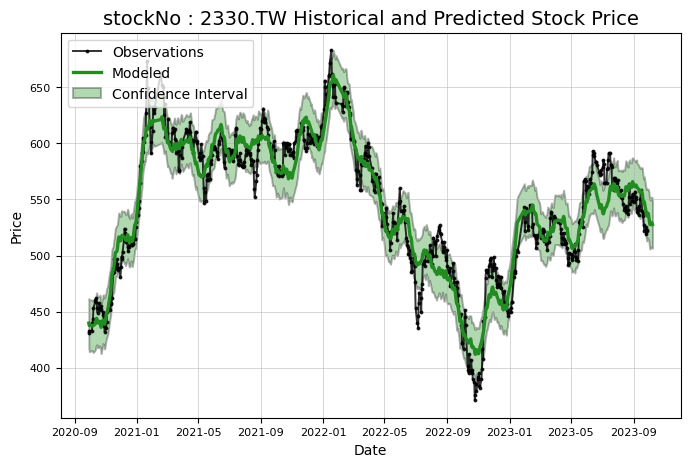

In [85]:
#預測 10天 (2023/10/1 - 2023/10/10)
model, modeldata_ana3 = stock.create_prophet_model(days=10)
stock.changepoint_prior_scale = 0.2

In [86]:
#預測數據
modeldata_ana3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-29,490.187051,417.497842,461.595810,490.187051,490.187051,-50.436175,-50.436175,-50.436175,-3.632164,-3.632164,-3.632164,-46.804011,-46.804011,-46.804011,0.0,0.0,0.0,439.750876
1,2020-09-30,490.758623,414.219662,460.699377,490.758623,490.758623,-53.228607,-53.228607,-53.228607,-5.079522,-5.079522,-5.079522,-48.149086,-48.149086,-48.149086,0.0,0.0,0.0,437.530015
2,2020-10-05,493.616481,415.416536,460.174455,493.616481,493.616481,-55.897105,-55.897105,-55.897105,-2.040044,-2.040044,-2.040044,-53.857062,-53.857062,-53.857062,0.0,0.0,0.0,437.719376
3,2020-10-06,494.188053,415.113451,459.407608,494.188053,494.188053,-57.037331,-57.037331,-57.037331,-2.214650,-2.214650,-2.214650,-54.822680,-54.822680,-54.822680,0.0,0.0,0.0,437.150723
4,2020-10-07,494.759625,413.793676,459.783142,494.759625,494.759625,-57.386093,-57.386093,-57.386093,-1.645256,-1.645256,-1.645256,-55.740837,-55.740837,-55.740837,0.0,0.0,0.0,437.373532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,2023-10-04,583.952310,506.340034,549.329344,583.952310,583.952310,-56.323946,-56.323946,-56.323946,-4.285997,-4.285997,-4.285997,-52.037949,-52.037949,-52.037949,0.0,0.0,0.0,527.628364
736,2023-10-05,584.380647,506.733613,552.095274,584.380647,584.380647,-55.535521,-55.535521,-55.535521,-2.436848,-2.436848,-2.436848,-53.098673,-53.098673,-53.098673,0.0,0.0,0.0,528.845125
737,2023-10-06,584.808983,507.695190,550.803189,584.808983,584.808983,-55.342298,-55.342298,-55.342298,-1.239107,-1.239107,-1.239107,-54.103191,-54.103191,-54.103191,0.0,0.0,0.0,529.466685
738,2023-10-07,585.237319,507.272127,552.035508,585.237319,585.237319,-56.408136,-56.408136,-56.408136,-1.351663,-1.351663,-1.351663,-55.056473,-55.056473,-55.056473,0.0,0.0,0.0,528.829183


In [87]:
#計算 RMSE (5筆真實值)
m = 0
sum_d= 0
for i in range(len(data30)):
    for ii in range(8):
        if data30.Date[i] == modeldata_ana3.ds[732+ii]:
            d = (data30.Close[i] - modeldata_ana3.yhat[732+ii])**2
            sum_d = sum_d + d
            m = m + 1
            continue
        else:
            continue

rmse30_3 = math.sqrt(sum_d/m)

In [88]:
rmse30_3

3.953665575773825

## 預測30天資料    (增加預測天數)

In [89]:
#真實數據 2020/1/1 - 2023/9/30
stockNo = "2330.TW"
start_date = '2020-01-01'
end_date = '2023-10-01'
df_0930 = yf.download(stockNo, start=start_date, end=end_date)
df_0930 = df_0930.reset_index()

[*********************100%%**********************]  1 of 1 completed


## 第二部份 使用 Stocker 預測股價

In [90]:
#預測股價 輸入 2020/1/1 - 2023/8/31
from stocker import Stocker
stock = Stocker(stockNo, df_0831)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-08-31 00:00:00.


## 使用 Prophet 預言家模型預測股價

20:29:50 - cmdstanpy - INFO - Chain [1] start processing
20:29:50 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-09-30 00:00:00 = $574.61


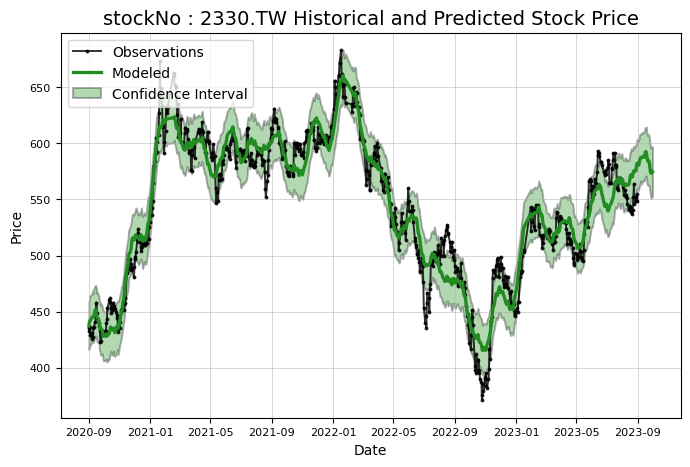

In [91]:
#輸出預測值 30天
model, model_data30 = stock.create_prophet_model(days=30)
stock.changepoint_prior_scale = 0.2

In [92]:
model_data30

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-01,450.974655,416.246919,457.872176,450.974655,450.974655,-13.793857,-13.793857,-13.793857,-3.222301,-3.222301,-3.222301,-10.571556,-10.571556,-10.571556,0.0,0.0,0.0,437.180798
1,2020-09-02,451.665347,418.127589,461.178264,451.665347,451.665347,-11.760157,-11.760157,-11.760157,-1.706043,-1.706043,-1.706043,-10.054113,-10.054113,-10.054113,0.0,0.0,0.0,439.905190
2,2020-09-03,452.356038,418.748845,464.420850,452.356038,452.356038,-10.720457,-10.720457,-10.720457,-1.073876,-1.073876,-1.073876,-9.646581,-9.646581,-9.646581,0.0,0.0,0.0,441.635581
3,2020-09-04,453.046730,420.399308,464.194199,453.046730,453.046730,-10.760994,-10.760994,-10.760994,-1.400251,-1.400251,-1.400251,-9.360743,-9.360743,-9.360743,0.0,0.0,0.0,442.285736
4,2020-09-07,455.118804,422.243908,465.515524,455.118804,455.118804,-10.670956,-10.670956,-10.670956,-1.349848,-1.349848,-1.349848,-9.321108,-9.321108,-9.321108,0.0,0.0,0.0,444.447848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2023-09-26,608.834741,553.978154,596.772712,608.007260,609.655722,-34.303837,-34.303837,-34.303837,-2.891871,-2.891871,-2.891871,-31.411965,-31.411965,-31.411965,0.0,0.0,0.0,574.530904
756,2023-09-27,609.410276,551.029082,595.666439,608.517263,610.293637,-36.097854,-36.097854,-36.097854,-3.121006,-3.121006,-3.121006,-32.976848,-32.976848,-32.976848,0.0,0.0,0.0,573.312422
757,2023-09-28,609.985811,551.335253,597.258430,608.995360,610.992946,-35.874092,-35.874092,-35.874092,-1.377612,-1.377612,-1.377612,-34.496480,-34.496480,-34.496480,0.0,0.0,0.0,574.111718
758,2023-09-29,610.561346,553.776433,596.455405,609.461977,611.638200,-35.400258,-35.400258,-35.400258,0.562667,0.562667,0.562667,-35.962925,-35.962925,-35.962925,0.0,0.0,0.0,575.161087


## 驗證資料

In [93]:
#驗證資料 2023/10/1 - 2023/10/15
stockNo = "2330.TW"
start_date = '2023-10-01'
end_date = '2023-10-16'
data30_1 = yf.download(stockNo, start=start_date, end=end_date)
data30_1 = data30_1.reset_index()

[*********************100%%**********************]  1 of 1 completed


## 第一種分析

In [94]:
#產生相同格式 30天
model_test30 = pd.DataFrame()
model_test30['Date'] = model_data30[730:760].ds.reset_index(drop=True)
model_test30['Open'] = model_data30[730:760].trend.reset_index(drop=True)
model_test30['High'] = model_data30[730:760].yhat_upper.reset_index(drop=True)
model_test30['Low'] = model_data30[730:760].yhat_lower.reset_index(drop=True)
model_test30['Close'] = model_data30[730:760].yhat.reset_index(drop=True)
model_test30['Adj Close'] = model_data30[730:760].yhat.reset_index(drop=True)
model_test30['Volume'] = df_0930[880:910].Volume.reset_index(drop=True)

In [95]:
model_test30

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-09-01,594.446368,603.066755,558.595843,581.299858,581.299858,17592345
1,2023-09-02,595.021903,602.015419,557.948588,580.460437,580.460437,16633821
2,2023-09-03,595.597438,603.426933,559.659476,581.197891,581.197891,14594304
3,2023-09-04,596.172973,607.156546,561.434094,583.387378,583.387378,20636332
4,2023-09-05,596.748508,607.844223,563.599303,585.732969,585.732969,23280827
5,2023-09-06,597.324042,608.228770,564.378089,587.060814,587.060814,24144537
6,2023-09-07,597.899577,608.578551,566.693804,587.289266,587.289266,8991985
7,2023-09-08,598.475112,608.136651,563.588980,587.224769,587.224769,10516678
8,2023-09-09,599.050647,609.431446,565.805499,587.548500,587.548500,15117416
9,2023-09-10,599.626182,608.915248,565.506238,588.120458,588.120458,40431378


In [96]:
#將30天資料加在 2023/8/31 後
ana1 = pd.concat([df_0831,model_test30],axis=0).reset_index(drop = True)

In [97]:
#輸入 2020/1/1 - 2023/9/30 (含預測資料)
stock = Stocker(stockNo, ana1)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-09-30 00:00:00.


20:29:51 - cmdstanpy - INFO - Chain [1] start processing
20:29:51 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-10-15 00:00:00 = $560.90


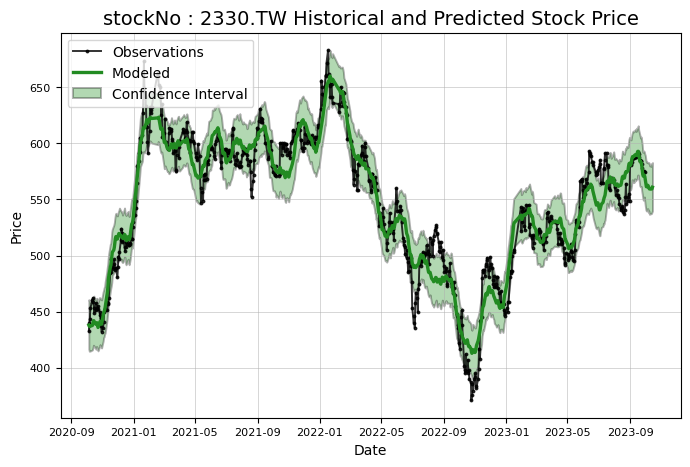

In [98]:
#預測 15天 (2023/10/1 - 2023/10/15)
model, modeldata_ana1 = stock.create_prophet_model(days=15)
stock.changepoint_prior_scale = 0.2

In [99]:
#預測數據
modeldata_ana1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-05,487.114234,416.496467,460.637305,487.114234,487.114234,-49.153424,-49.153424,-49.153424,-1.923641,-1.923641,-1.923641,-47.229783,-47.229783,-47.229783,0.0,0.0,0.0,437.960810
1,2020-10-06,487.704598,414.640553,459.481376,487.704598,487.704598,-50.833050,-50.833050,-50.833050,-2.309478,-2.309478,-2.309478,-48.523572,-48.523572,-48.523572,0.0,0.0,0.0,436.871548
2,2020-10-07,488.294962,414.768650,457.979301,488.294962,488.294962,-51.561368,-51.561368,-51.561368,-1.828018,-1.828018,-1.828018,-49.733350,-49.733350,-49.733350,0.0,0.0,0.0,436.733593
3,2020-10-08,488.885326,414.880225,459.123704,488.885326,488.885326,-51.921982,-51.921982,-51.921982,-1.060179,-1.060179,-1.060179,-50.861803,-50.861803,-50.861803,0.0,0.0,0.0,436.963344
4,2020-10-12,491.246781,415.881685,459.874709,491.246781,491.246781,-53.598904,-53.598904,-53.598904,1.037853,1.037853,1.037853,-54.636756,-54.636756,-54.636756,0.0,0.0,0.0,437.647878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2023-10-11,613.899468,537.193810,581.103467,613.880505,613.954241,-54.182155,-54.182155,-54.182155,-1.060179,-1.060179,-1.060179,-53.121976,-53.121976,-53.121976,0.0,0.0,0.0,559.717313
749,2023-10-12,614.467211,537.187372,581.726512,614.412518,614.562689,-54.785083,-54.785083,-54.785083,-0.773160,-0.773160,-0.773160,-54.011923,-54.011923,-54.011923,0.0,0.0,0.0,559.682129
750,2023-10-13,615.034955,537.464246,579.264556,614.941668,615.176101,-55.758567,-55.758567,-55.758567,-0.921321,-0.921321,-0.921321,-54.837246,-54.837246,-54.837246,0.0,0.0,0.0,559.276388
751,2023-10-14,615.602699,538.615902,581.021896,615.479432,615.776796,-56.185027,-56.185027,-56.185027,-0.583239,-0.583239,-0.583239,-55.601788,-55.601788,-55.601788,0.0,0.0,0.0,559.417672


In [100]:
#計算 RMSE (8筆真實值)
m = 0
sum_d= 0
for i in range(len(data30_1)):
    for ii in range(15):
        if data30_1.Date[i] == modeldata_ana1.ds[738+ii]:
            d = (data30_1.Close[i] - modeldata_ana1.yhat[738+ii])**2
            sum_d = sum_d + d
            m = m + 1
            continue
        else:
            continue

rmse30_1 = math.sqrt(sum_d/m)

In [101]:
rmse30_1

27.739606948234186

## 第二種分析

In [102]:
#模式誤差
n = 0
sum_sigma = 0
for i in range(len(model_data30)):
        sigma = ((model_data30.yhat_upper[i] - model_data30.yhat_lower[i])/2)
        sum_sigma = sum_sigma + sigma
        n = n + 1

pf = sum_sigma/n

In [103]:
#觀測誤差
ave = sum(df_0930.Close[880:910])/30
true_sigma = 0
for i in range(30):
    s = (df_0930.Close[880+i] - ave)**2
    true_sigma += s

true_sigma = true_sigma/30
R = true_sigma

In [104]:
#權重
K = pf/(R+pf)

In [105]:
#資料同化
model_data30_2 = model_test30
for i in range(20):
    for ii in range(30):
        if df_0930.Date[890+i] != model_data30.ds[730+ii]:
            continue
        else:
            model_data30_2.Close[ii] = model_data30.yhat[730+ii] + K * (df_0930.Close[890+i]-model_data30.yhat[730+ii])
            model_data30_2['Adj Close'][ii] = model_data30_2.Close[ii]

#將30天資料加在 2023/8/31 後
ana2 =pd.concat([df_0831,model_data30_2],axis=0).reset_index(drop = True)

C:\Users\ymwang\AppData\Local\Temp\ipykernel_5248\3694250433.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data30_2.Close[ii] = model_data30.yhat[730+ii] + K * (df_0930.Close[890+i]-model_data30.yhat[730+ii])
C:\Users\ymwang\AppData\Local\Temp\ipykernel_5248\3694250433.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data30_2['Adj Close'][ii] = model_data30_2.Close[ii]
C:\Users\ymwang\AppData\Local\Temp\ipykernel_5248\3694250433.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [106]:
#輸入 2020/1/1 - 2023/9/30 (含同化後預測資料)
stock = Stocker(stockNo, ana2)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-09-30 00:00:00.


20:29:52 - cmdstanpy - INFO - Chain [1] start processing
20:29:52 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-10-15 00:00:00 = $557.99


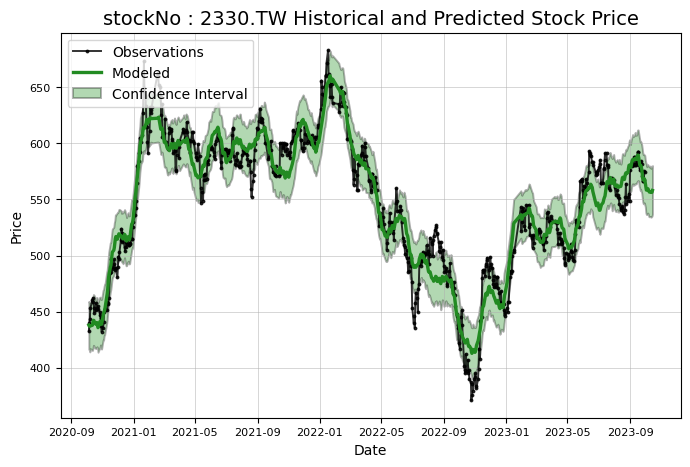

In [107]:
#預測 15天 (2023/10/1 - 2023/10/15)
model, modeldata_ana2 = stock.create_prophet_model(days=15)
stock.changepoint_prior_scale = 0.2

In [108]:
#預測數據
modeldata_ana2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-05,487.678392,416.359587,459.125354,487.678392,487.678392,-49.701209,-49.701209,-49.701209,-1.969953,-1.969953,-1.969953,-47.731255,-47.731255,-47.731255,0.0,0.0,0.0,437.977183
1,2020-10-06,488.266052,416.365938,457.894373,488.266052,488.266052,-51.247592,-51.247592,-51.247592,-2.263341,-2.263341,-2.263341,-48.984251,-48.984251,-48.984251,0.0,0.0,0.0,437.018460
2,2020-10-07,488.853712,414.077159,458.072891,488.853712,488.853712,-51.888933,-51.888933,-51.888933,-1.728832,-1.728832,-1.728832,-50.160102,-50.160102,-50.160102,0.0,0.0,0.0,436.964779
3,2020-10-08,489.441372,416.961660,458.391242,489.441372,489.441372,-52.271325,-52.271325,-52.271325,-1.009656,-1.009656,-1.009656,-51.261669,-51.261669,-51.261669,0.0,0.0,0.0,437.170047
4,2020-10-12,491.792013,415.383450,459.418838,491.792013,491.792013,-53.959396,-53.959396,-53.959396,1.037925,1.037925,1.037925,-54.997321,-54.997321,-54.997321,0.0,0.0,0.0,437.832616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2023-10-11,611.419094,534.698619,579.803803,611.414859,611.517395,-54.496535,-54.496535,-54.496535,-1.009656,-1.009656,-1.009656,-53.486880,-53.486880,-53.486880,0.0,0.0,0.0,556.922558
749,2023-10-12,611.974785,534.143243,577.614944,611.950261,612.113202,-55.222647,-55.222647,-55.222647,-0.850578,-0.850578,-0.850578,-54.372069,-54.372069,-54.372069,0.0,0.0,0.0,556.752138
750,2023-10-13,612.530477,534.470237,579.385308,612.464040,612.713692,-56.299960,-56.299960,-56.299960,-1.101296,-1.101296,-1.101296,-55.198664,-55.198664,-55.198664,0.0,0.0,0.0,556.230517
751,2023-10-14,613.086169,535.054914,578.388317,612.989376,613.307583,-56.708260,-56.708260,-56.708260,-0.738338,-0.738338,-0.738338,-55.969922,-55.969922,-55.969922,0.0,0.0,0.0,556.377909


In [109]:
#計算 RMSE (8筆真實值)
m = 0
sum_d= 0
for i in range(len(data30_1)):
    for ii in range(15):
        if data30_1.Date[i] == modeldata_ana2.ds[738+ii]:
            d = (data30_1.Close[i] - modeldata_ana2.yhat[738+ii])**2
            sum_d = sum_d + d
            m = m + 1
            continue
        else:
            continue

rmse30_2 = math.sqrt(sum_d/m)

In [110]:
rmse30_2

25.089633703153485

## 第三種分析

In [111]:
#直接輸入真實值 2020/1/1 - 2023/9/30
stock = Stocker(stockNo, df_0930)

stockNo : 2330.TW Stocker Initialized. Data covers 2020-01-02 00:00:00 to 2023-09-28 00:00:00.


20:29:53 - cmdstanpy - INFO - Chain [1] start processing
20:29:54 - cmdstanpy - INFO - Chain [1] done processing


Predicted Price on 2023-10-13 00:00:00 = $526.31


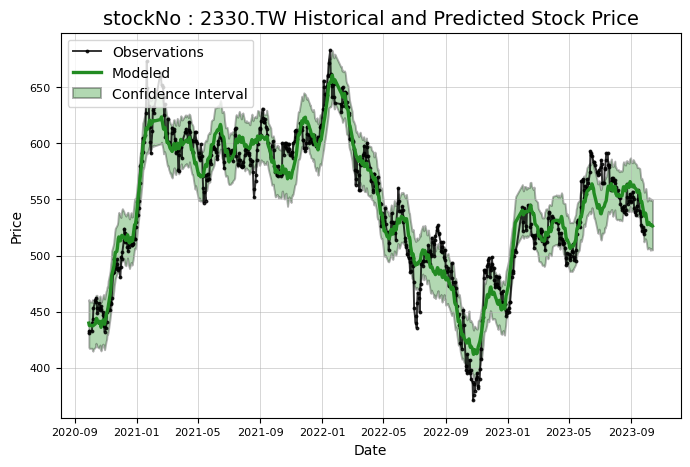

In [112]:
#預測 15天 (2023/10/1 - 2023/10/15)
model, modeldata_ana3 = stock.create_prophet_model(days=15)
stock.changepoint_prior_scale = 0.2

In [113]:
#預測數據
modeldata_ana3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-29,490.187051,418.329979,460.701715,490.187051,490.187051,-50.436175,-50.436175,-50.436175,-3.632164,-3.632164,-3.632164,-46.804011,-46.804011,-46.804011,0.0,0.0,0.0,439.750876
1,2020-09-30,490.758623,417.230994,458.843651,490.758623,490.758623,-53.228607,-53.228607,-53.228607,-5.079522,-5.079522,-5.079522,-48.149086,-48.149086,-48.149086,0.0,0.0,0.0,437.530015
2,2020-10-05,493.616481,417.356366,458.425742,493.616481,493.616481,-55.897105,-55.897105,-55.897105,-2.040044,-2.040044,-2.040044,-53.857062,-53.857062,-53.857062,0.0,0.0,0.0,437.719376
3,2020-10-06,494.188053,415.671239,460.629185,494.188053,494.188053,-57.037331,-57.037331,-57.037331,-2.214650,-2.214650,-2.214650,-54.822680,-54.822680,-54.822680,0.0,0.0,0.0,437.150723
4,2020-10-07,494.759625,414.676783,459.054013,494.759625,494.759625,-57.386093,-57.386093,-57.386093,-1.645256,-1.645256,-1.645256,-55.740837,-55.740837,-55.740837,0.0,0.0,0.0,437.373532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,2023-10-09,586.093992,504.645637,549.138116,585.997686,586.093992,-59.043917,-59.043917,-59.043917,-2.214650,-2.214650,-2.214650,-56.829266,-56.829266,-56.829266,0.0,0.0,0.0,527.050075
741,2023-10-10,586.522328,506.062236,550.502817,586.369419,586.522328,-59.303405,-59.303405,-59.303405,-1.645256,-1.645256,-1.645256,-57.658149,-57.658149,-57.658149,0.0,0.0,0.0,527.218923
742,2023-10-11,586.950665,506.101176,549.203884,586.749973,586.974645,-59.526280,-59.526280,-59.526280,-1.072139,-1.072139,-1.072139,-58.454141,-58.454141,-58.454141,0.0,0.0,0.0,527.424385
743,2023-10-12,587.379001,505.027874,548.691322,587.114362,587.446901,-60.387716,-60.387716,-60.387716,-1.167261,-1.167261,-1.167261,-59.220456,-59.220456,-59.220456,0.0,0.0,0.0,526.991285


In [114]:
#計算 RMSE (8筆真實值)
m = 0
sum_d= 0
for i in range(len(data30)):
    for ii in range(13):
        if data30.Date[i] == modeldata_ana3.ds[732+ii]:
            d = (data30.Close[i] - modeldata_ana3.yhat[732+ii])**2
            sum_d = sum_d + d
            m = m + 1
            continue
        else:
            continue

rmse30_3 = math.sqrt(sum_d/m)

In [115]:
rmse30_3

3.953665575773825